In [2]:
# Conectar con unidad de drive donde esta guardado el csv con los datos
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd

# Leer el archivo con pandas
file_path = '/content/drive/MyDrive/certificado DS/Train_USL.csv'
data = pd.read_csv(file_path)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [83]:
'''
Descripcion de kaggle:

+-----------------------------+-----------------------------------------------------------+
| Column Name                 | Description                                               |
+-----------------------------+-----------------------------------------------------------+
| Employee_ID                 | Unique ID of each employee                                |
| Age                         | Age of each employee                                      |
| Unit                        | Department under which the employee works                 |
| Education                   | Rating of Qualification of an employee (1-5)             |
| Gender                      | Male-0 or Female-1                                       |
| Decision_skill_possess      | Decision skill that an employee possesses                 |
| Post_Level                  | Level of the post in an organization (1-5)               |
| Relationship_Status         | Categorical Married or Single                             |
| Pay Scale                   | Rate in between 1 to 10                                  |
| Time_of_service             | Years in the organization                                 |
| growth_rate                 | Growth rate in percentage of an employee                  |
| Time_since_promotion        | Time in years since the last promotion                    |
| Work_Life_balance           | Rating for work-life balance given by an employee        |
| Travel_Rate                 | Rating based on travel history (1-3)                     |
| Hometown                    | Name of the city                                         |
| Compensation_and_Benefits   | Categorical Variable                                      |
| VAR1 - VAR5                 | Anonymised variables                                      |
| Attrition_rate (TARGET)     | Attrition rate of each employee                           |
+-----------------------------+-----------------------------------------------------------+

'''
print('')

In [5]:
for column in data.select_dtypes(exclude=['int64', 'float64']):
    unique_values = data[column].unique()
    print(f"Valores distintos de '{column}': {unique_values}")

Valores distintos de 'Employee_ID': ['EID_23371' 'EID_18000' 'EID_3891' ... 'EID_8077' 'EID_19597' 'EID_1640']
Valores distintos de 'Gender': ['F' 'M']
Valores distintos de 'Relationship_Status': ['Married' 'Single']
Valores distintos de 'Hometown': ['Franklin' 'Springfield' 'Clinton' 'Lebanon' 'Washington']
Valores distintos de 'Unit': ['IT' 'Logistics' 'Quality' 'Human Resource Management' 'Purchasing'
 'Sales' 'Production' 'Operarions' 'Accounting and Finance' 'Marketing'
 'R&D' 'Security']
Valores distintos de 'Decision_skill_possess': ['Conceptual' 'Analytical' 'Behavioral' 'Directive']
Valores distintos de 'Compensation_and_Benefits': ['type2' 'type3' 'type0' 'type4' 'type1']


In [6]:
data_no_na = data.copy()

# Eliminar columna de ID, es numero arbitrario hasta donde se sabe y no indica proximidad
data_no_na.drop(columns=["Employee_ID"], inplace=True)

# Eliminar filas sin 'pay scale' o sin 'work life balance', hay pocas de ellas
data_no_na.dropna(subset=['Pay_Scale', 'Work_Life_balance'], inplace=True)

# Rellenar valores faltantes de 'age' y 'time of service' con sus promedios, hay cientos de ellos
for column in ['Age', 'Time_of_service']:
    mean_value = data_no_na[column].mean()
    data_no_na[column].fillna(mean_value, inplace=True)

# Eliminar columnas de 'VAR1 - VAR5', ni aqui https://www.hackerearth.com/challenges/new/competitive/hackerearth-machine-learning-challenge-predict-employee-attrition-rate/#about
# dice que significan, no estoy seguro como interpretar eso si afectan mucho los resultados
columns_to_drop = [f"VAR{i}" for i in range (1, 8)]
data_no_na.drop(columns=columns_to_drop, inplace=True)

print(data_no_na.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6981 entries, 0 to 6999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     6981 non-null   object 
 1   Age                        6981 non-null   float64
 2   Education_Level            6981 non-null   int64  
 3   Relationship_Status        6981 non-null   object 
 4   Hometown                   6981 non-null   object 
 5   Unit                       6981 non-null   object 
 6   Decision_skill_possess     6981 non-null   object 
 7   Time_of_service            6981 non-null   float64
 8   Time_since_promotion       6981 non-null   int64  
 9   growth_rate                6981 non-null   int64  
 10  Travel_Rate                6981 non-null   int64  
 11  Post_Level                 6981 non-null   int64  
 12  Pay_Scale                  6981 non-null   float64
 13  Compensation_and_Benefits  6981 non-null   object 
 1

<ipython-input-6-f052055fa881>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_no_na[column].fillna(mean_value, inplace=True)


In [7]:
data_oh = data_no_na.copy()

# Como no hay columnas categoricas ordinales, condificar a la 'one hot'
nominal_columns = [column for column in data_no_na.select_dtypes(exclude=['int64', 'float64'])]
print(nominal_columns)
data_oh = pd.get_dummies(data_oh, columns=nominal_columns)
print(data_oh.info())

['Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits']
<class 'pandas.core.frame.DataFrame'>
Index: 6981 entries, 0 to 6999
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                6981 non-null   float64
 1   Education_Level                    6981 non-null   int64  
 2   Time_of_service                    6981 non-null   float64
 3   Time_since_promotion               6981 non-null   int64  
 4   growth_rate                        6981 non-null   int64  
 5   Travel_Rate                        6981 non-null   int64  
 6   Post_Level                         6981 non-null   int64  
 7   Pay_Scale                          6981 non-null   float64
 8   Work_Life_balance                  6981 non-null   float64
 9   Attrition_rate                     6981 non-null   float64
 10  Gender_F        

In [8]:
from sklearn.preprocessing import StandardScaler

data_scaled = data_oh.copy()

numerical_columns = [column for column in data_oh.select_dtypes(include=['int64', 'float64'])]
print(numerical_columns)

print("Antes de escalar:")
print(data_oh[numerical_columns].describe())

scaler = StandardScaler()
data_scaled[numerical_columns] = scaler.fit_transform(data_oh[numerical_columns])

print("Despues de escalar:")
print(data_scaled[numerical_columns].describe())

['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Work_Life_balance', 'Attrition_rate']
Antes de escalar:
               Age  Education_Level  Time_of_service  Time_since_promotion  \
count  6981.000000      6981.000000      6981.000000           6981.000000   
mean     39.624144         3.188368        13.385054              2.368285   
std      13.205989         1.064489        10.260023              1.149445   
min      19.000000         1.000000         0.000000              0.000000   
25%      28.000000         3.000000         5.000000              1.000000   
50%      39.624144         3.000000        10.000000              2.000000   
75%      51.000000         4.000000        20.000000              3.000000   
max      65.000000         5.000000        43.000000              4.000000   

       growth_rate  Travel_Rate   Post_Level    Pay_Scale  Work_Life_balance  \
count  6981.000000  6981.000000  

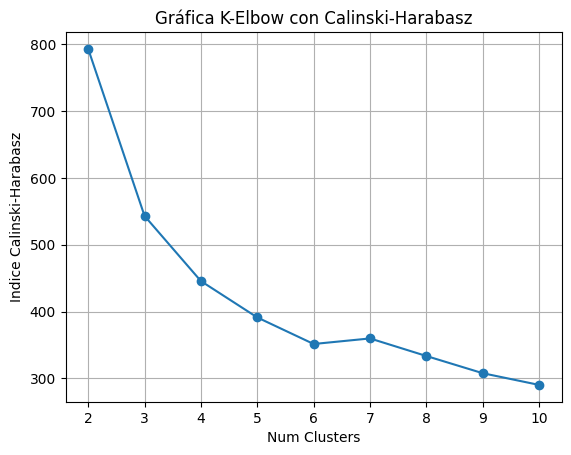

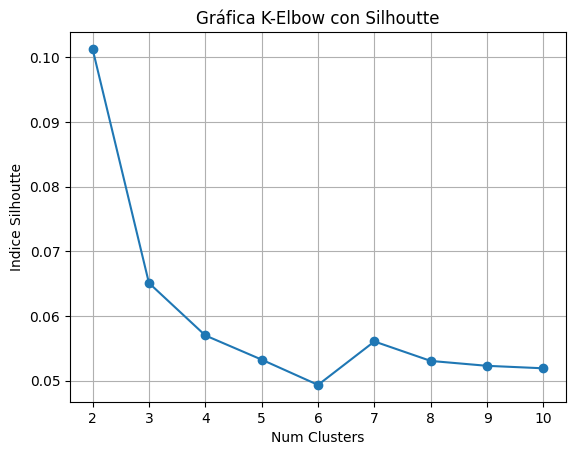

In [9]:
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score

def plot_index_vs_clusters(index_values, clusters_counts, index_name):
  plt.plot(clusters_counts, index_values, 'o-')
  plt.grid(True)
  plt.title(f"Gráfica K-Elbow con {index_name}")
  plt.xlabel("Num Clusters")
  plt.xticks(clusters_counts)
  plt.ylabel(f"Indice {index_name}")
  plt.show()

results_ch = {}
results_sil = {}

for k in range(2, 11):
  k_means = cluster.KMeans(n_clusters=k, random_state=2024).fit(data_scaled)
  y_pred = k_means.predict(data_scaled)
  results_ch[k] = calinski_harabasz_score (data_scaled, y_pred)
  results_sil[k] = silhouette_score(data_scaled, y_pred)

plot_index_vs_clusters(list(results_ch.values()), list(results_ch.keys()), "Calinski-Harabasz")
plot_index_vs_clusters(list(results_sil.values()), list(results_sil.keys()), "Silhoutte")

In [10]:
k_chosen = 7 # de acuerdo a las graficas anteriores

k_means = cluster.KMeans(n_clusters=k_chosen, random_state=2024).fit(data_scaled)
y_pred = k_means.predict(data_scaled)

data_k = data_no_na.copy()
data_k['cluster'] = y_pred

In [21]:
import numpy as np

groups = [data_k[data_k['cluster'] == i] for i in range(k_chosen)]

summary = pd.DataFrame()
summary['Features'] = data_k.columns[:-1]

for i in range(k_chosen):
  row = []
  for col in summary['Features']:
    if groups[i][col].dtype != 'object':
      row.append(np.round(groups[i][col].mean(), 2)) # Promedio del grupo
    else:
      row.append(groups[i][col].value_counts().keys()[0]) # Categoria mas frecuente

  summary[f'Group {i}'] = row

summary

,Features,Group 0,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6
0,Gender,F,F,F,F,F,F,F
1,Age,32.8,55.47,33.65,29.59,54.27,38.08,34.19
2,Education_Level,3.48,3.26,3.49,3.62,3.26,3.19,1.35
3,Relationship_Status,Married,Married,Married,Married,Married,Married,Married
4,Hometown,Lebanon,Lebanon,Lebanon,Lebanon,Lebanon,Lebanon,Lebanon
5,Unit,IT,IT,IT,IT,IT,IT,IT
6,Decision_skill_possess,Behavioral,Conceptual,Analytical,Analytical,Behavioral,Conceptual,Conceptual
7,Time_of_service,7.49,26.27,8.46,5.82,25.25,11.69,8.91
8,Time_since_promotion,2.3,2.44,3.54,1.31,2.47,2.42,2.16
9,growth_rate,43.39,61.07,49.75,48.4,31.99,47.79,46.76


In [47]:
attritioned_group = 5
for i in range(k_chosen):
  print(f"Grupo {i} tiene {len(groups[i])} empleados")

attritioned_group_percentage = len(groups[attritioned_group]) / len(data_k) * 100
print(f"El grupo {attritioned_group} tiene el {attritioned_group_percentage}% de los empleados")
# Pie chart for next time

Grupo 0 tiene 1032 empleados
Grupo 1 tiene 1058 empleados
Grupo 2 tiene 1204 empleados
Grupo 3 tiene 1320 empleados
Grupo 4 tiene 1067 empleados
Grupo 5 tiene 550 empleados
Grupo 6 tiene 750 empleados
El grupo 5 tiene el 7.878527431600057% de los empleados


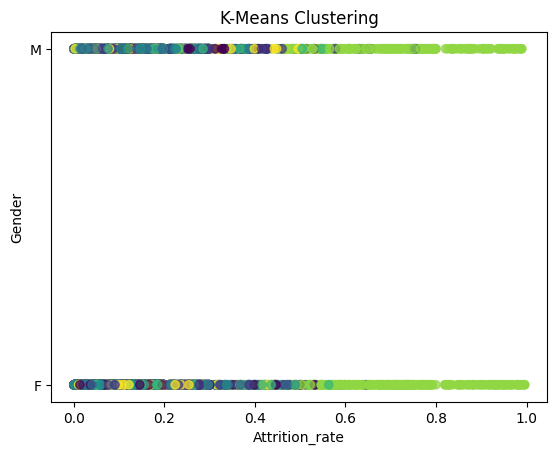

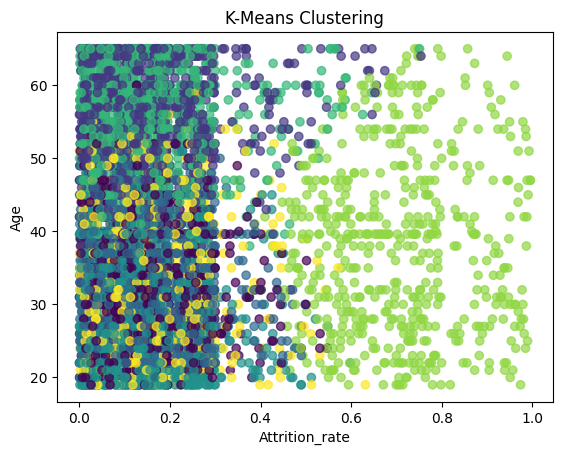

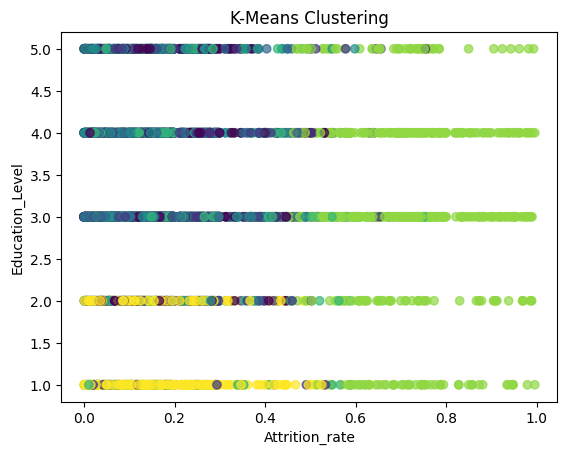

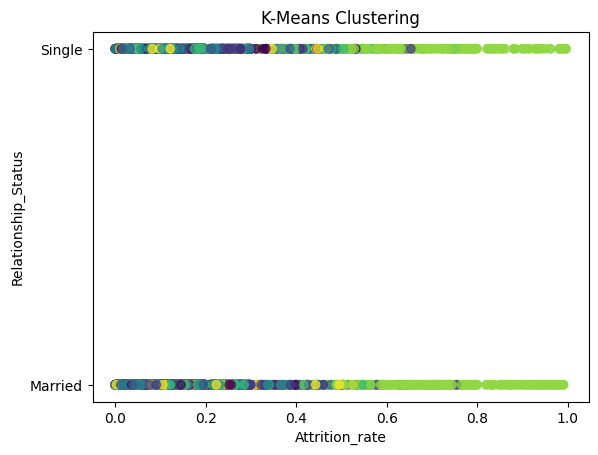

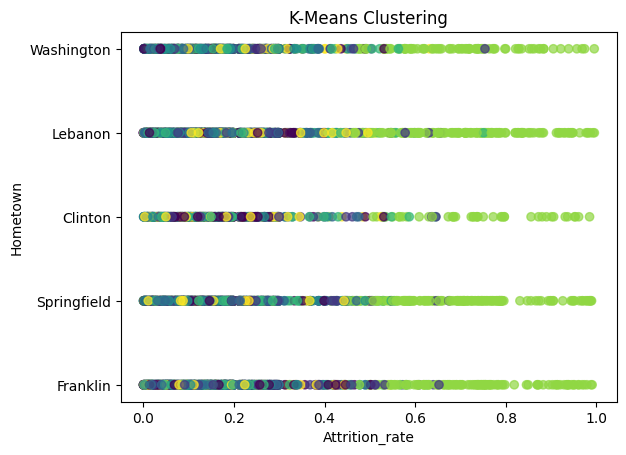

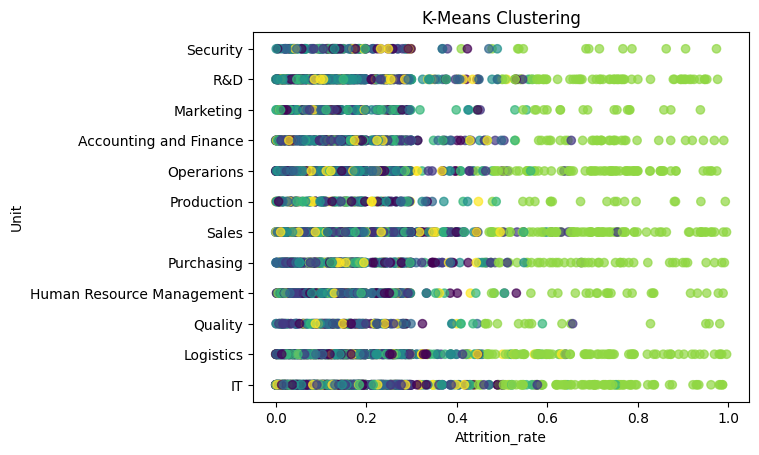

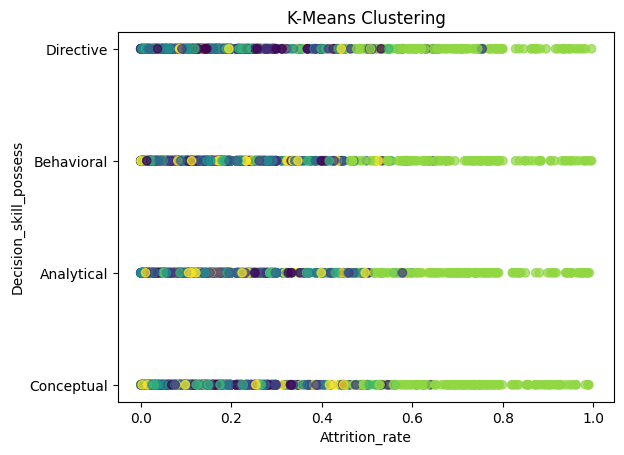

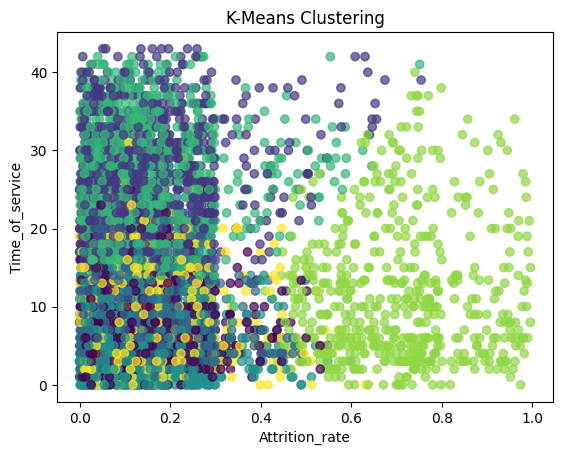

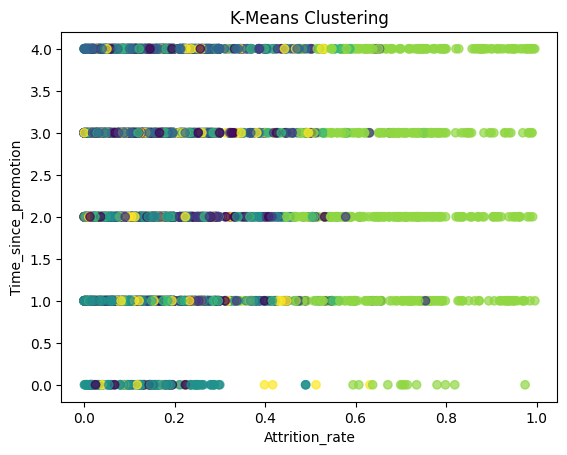

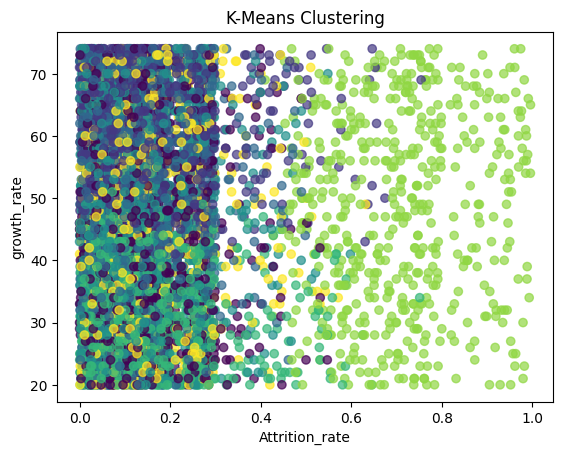

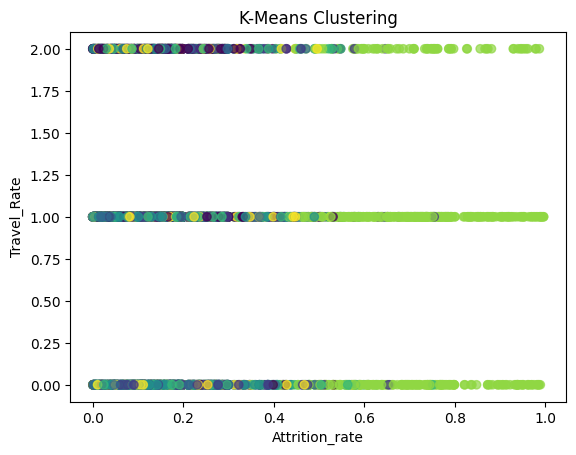

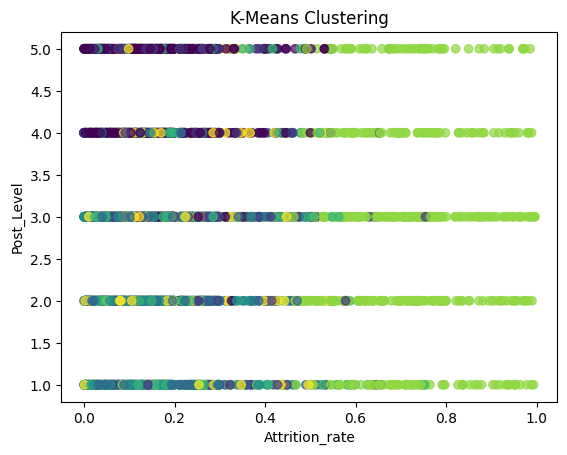

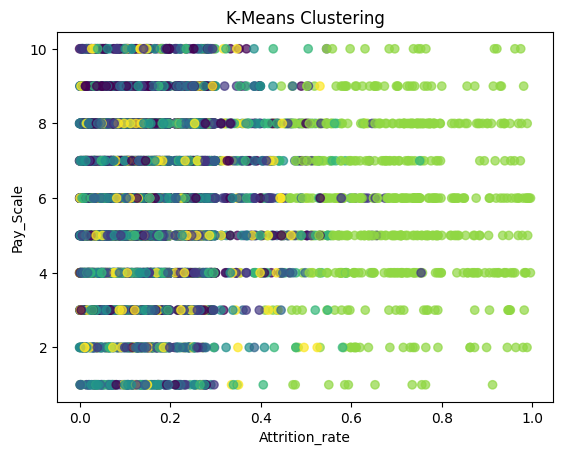

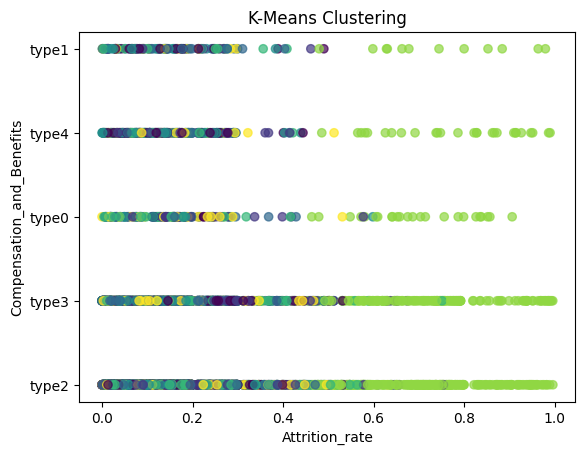

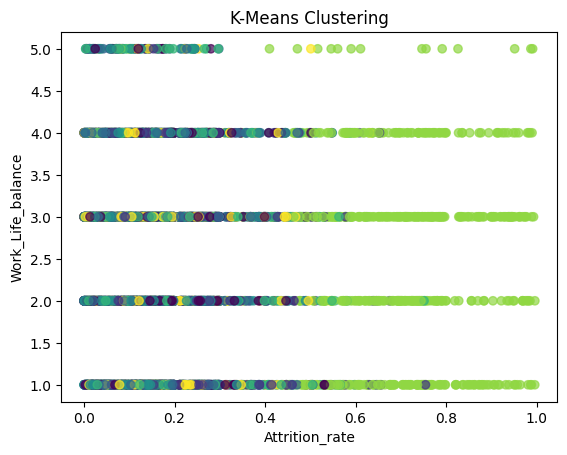

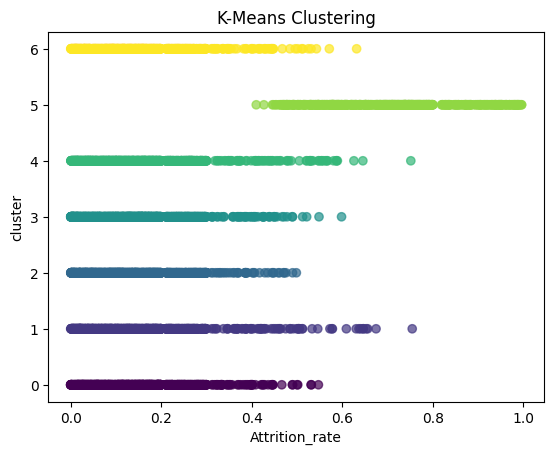

In [49]:
for column in data_k.columns:
  if column == 'Attrition_rate':
    continue

  plt.scatter(data_k.loc[:, "Attrition_rate"], data_k.loc[:, column], c=data_k['cluster'], alpha=0.7)
  plt.xlabel('Attrition_rate')
  plt.ylabel(column)
  plt.title('K-Means Clustering')
  plt.show()

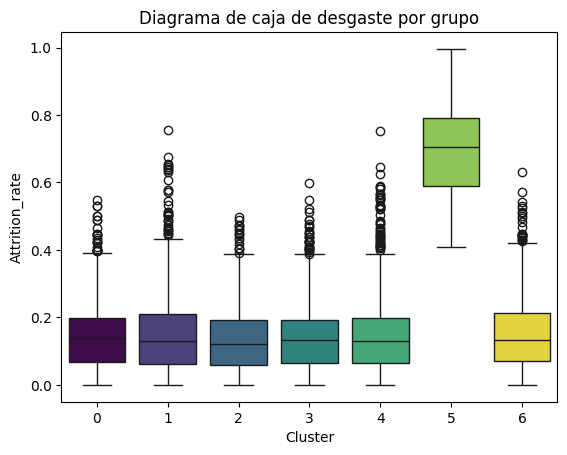

In [60]:
import seaborn as sns

num_clusters = k_chosen
viridis_colors = plt.cm.viridis(np.linspace(0, 1, num_clusters))
cluster_colors = {i: viridis_colors[i] for i in range(k_chosen)}

sns.boxplot(x='cluster', y='Attrition_rate', data=data_k, hue='cluster', legend=False, palette=cluster_colors)
plt.title('Diagrama de caja de desgaste por grupo')
plt.xlabel('Cluster')
plt.ylabel('Attrition_rate')
plt.show()

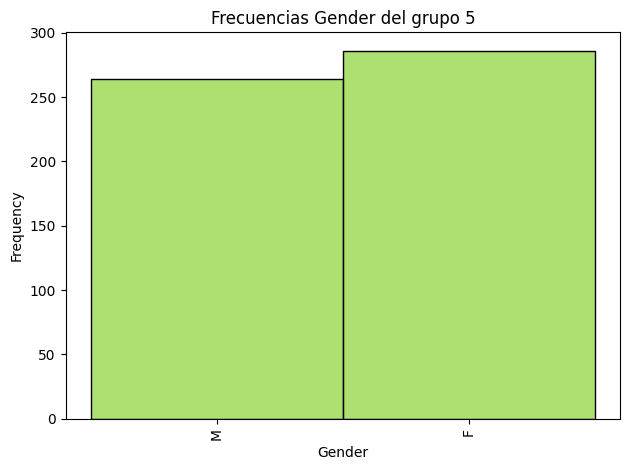

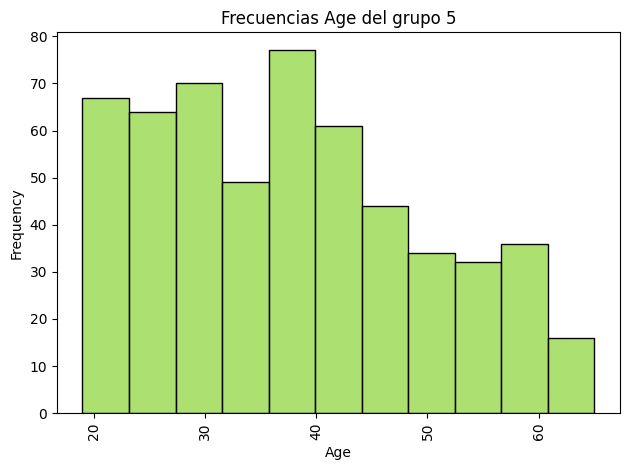

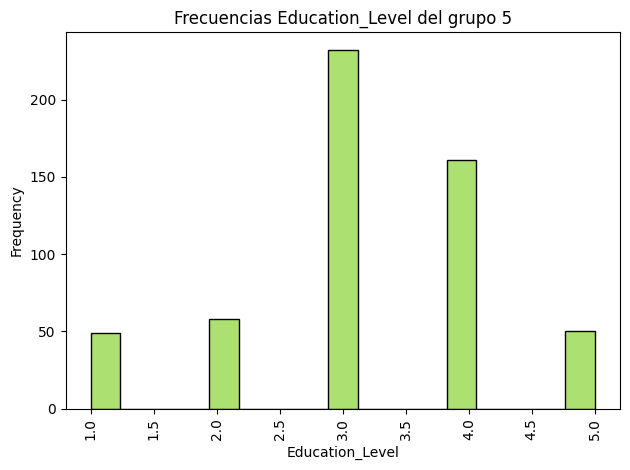

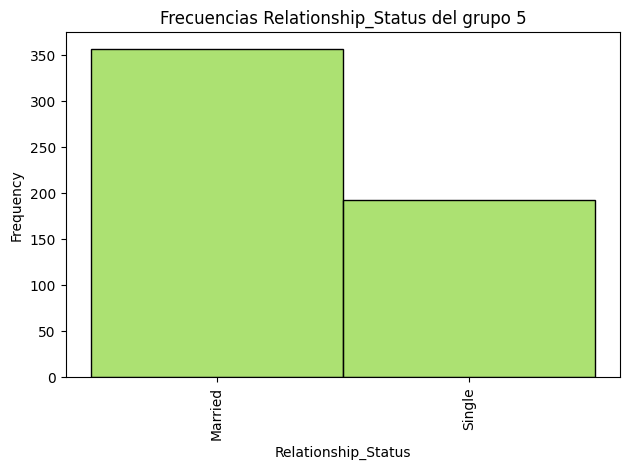

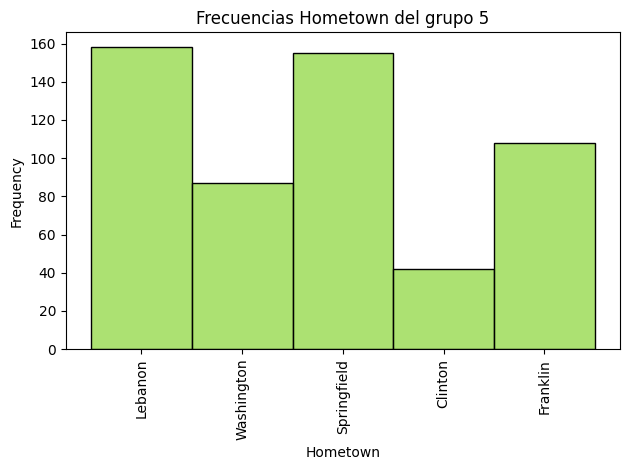

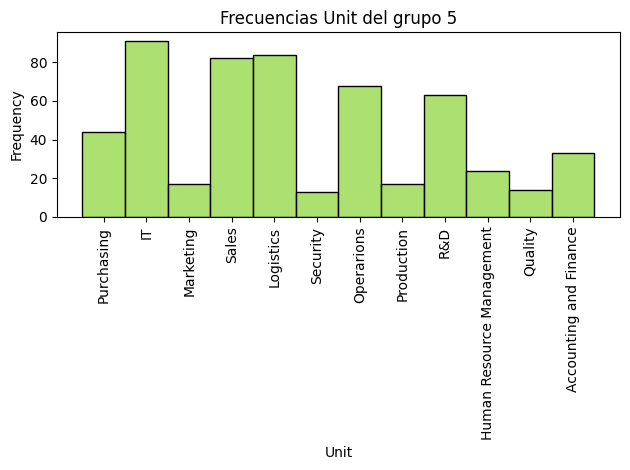

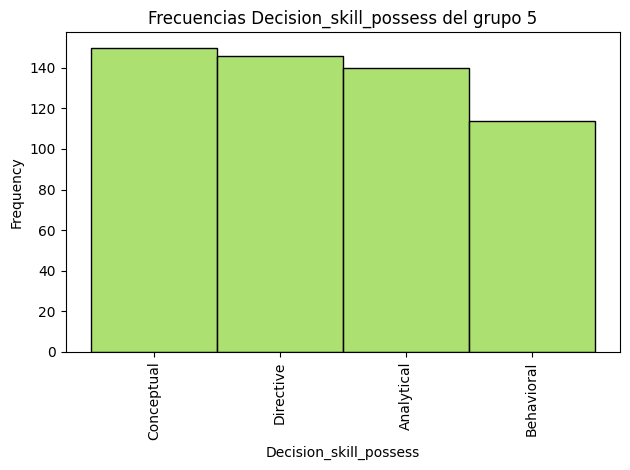

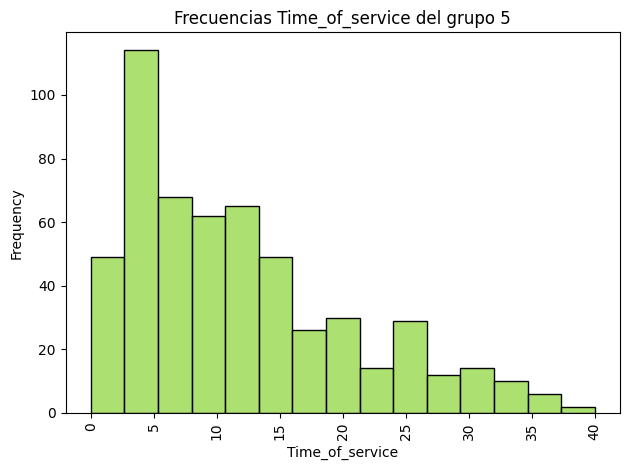

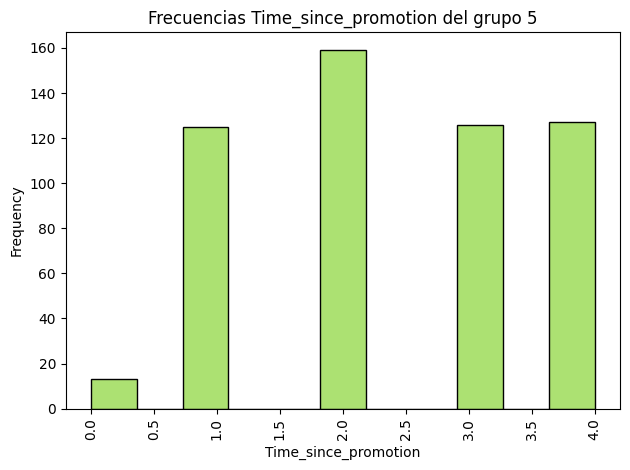

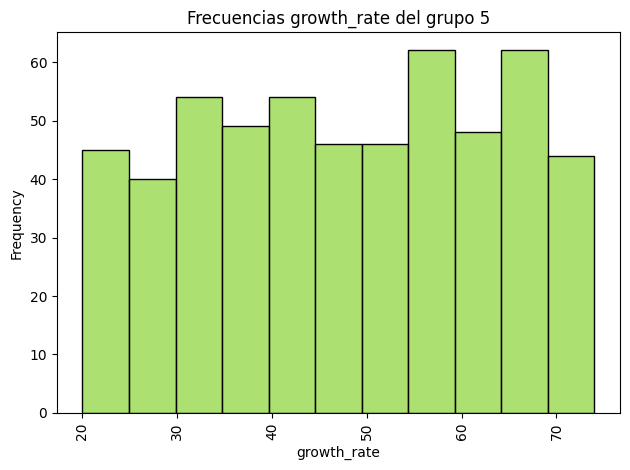

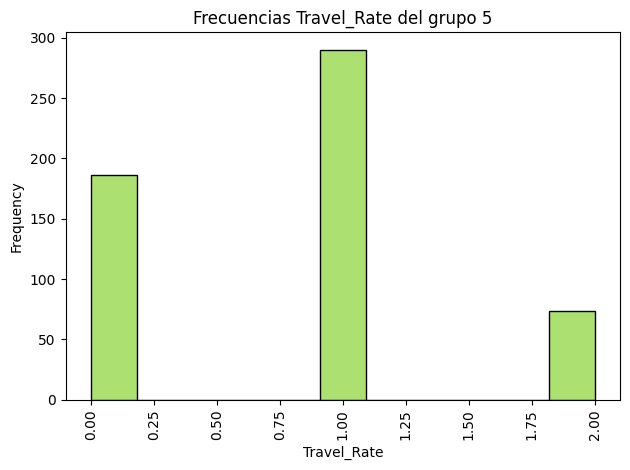

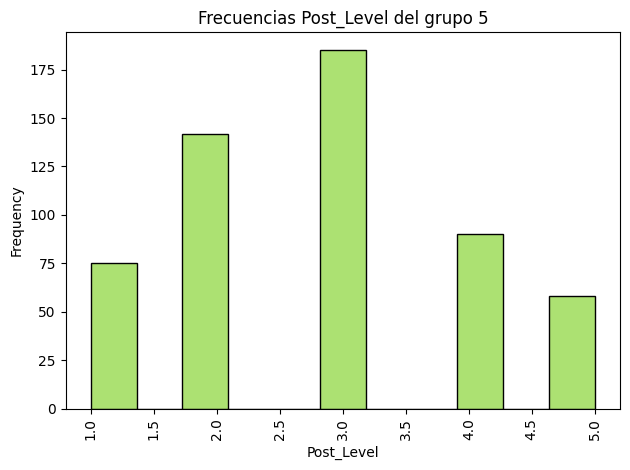

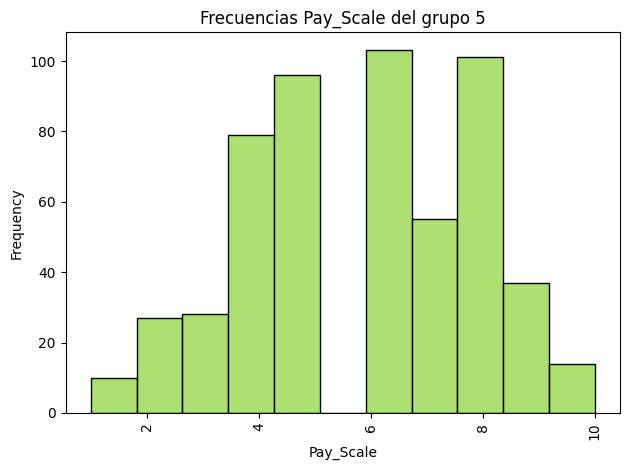

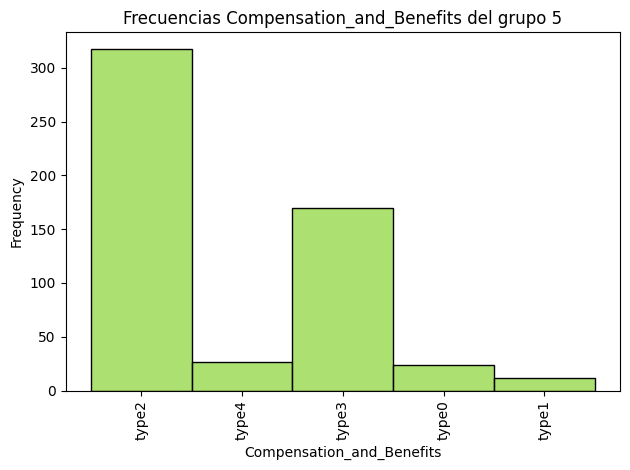

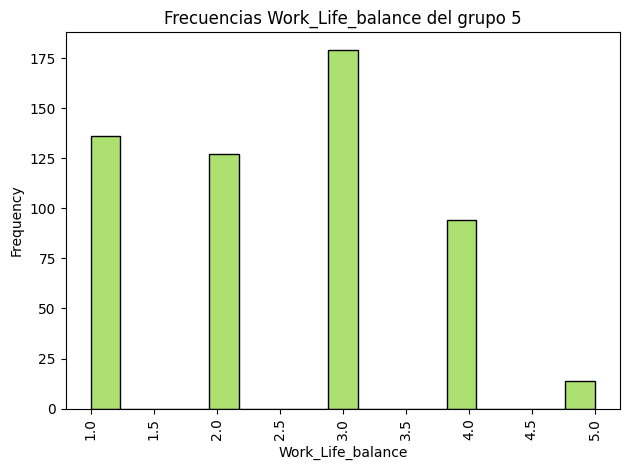

In [87]:
attritioned_group_color = viridis_colors[attritioned_group]

def plot_counts(column):
  sns.histplot(groups[attritioned_group][column], bins='auto', color=attritioned_group_color, edgecolor='black')
  plt.title(f'Frecuencias {column} del grupo 5')
  plt.xlabel(column)
  plt.xticks(rotation=90)
  plt.ylabel('Frequency')

  plt.tight_layout()
  plt.show()

for column in data_k.columns:
  if column == 'cluster' or column == 'Attrition_rate':
    continue

  plot_counts(column)


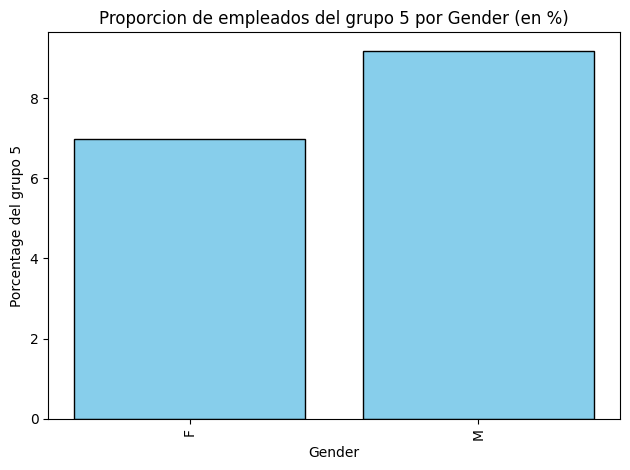

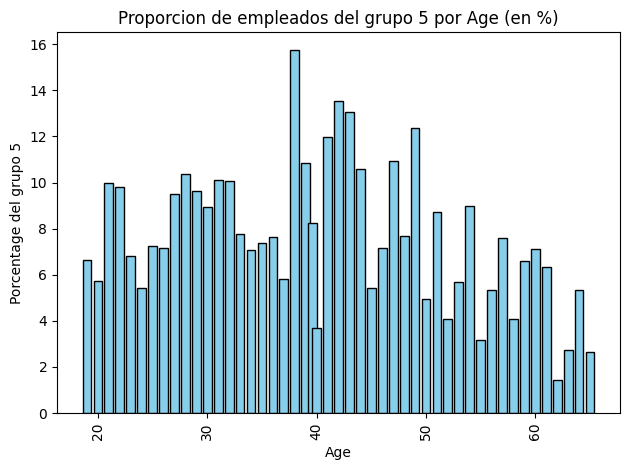

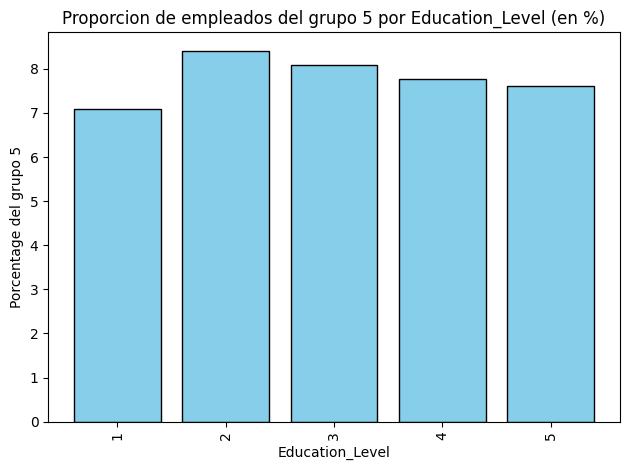

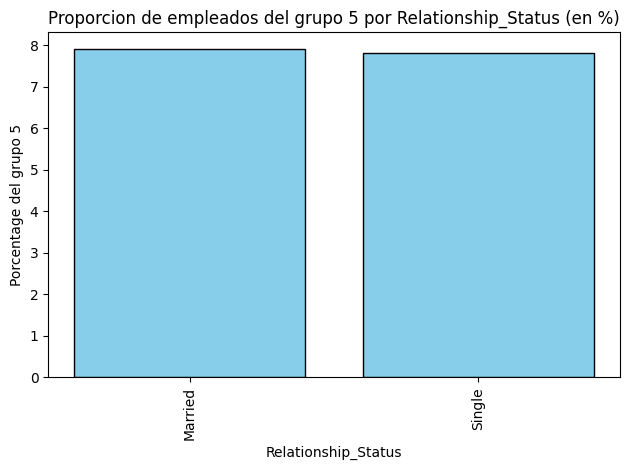

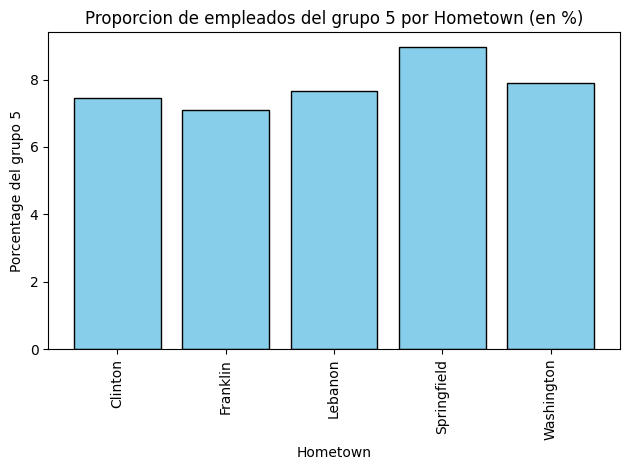

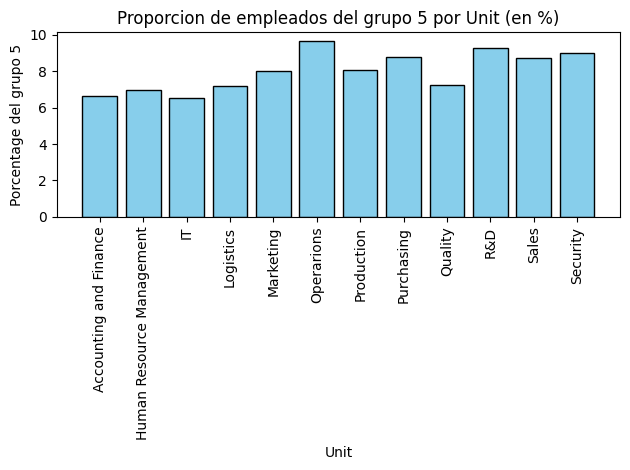

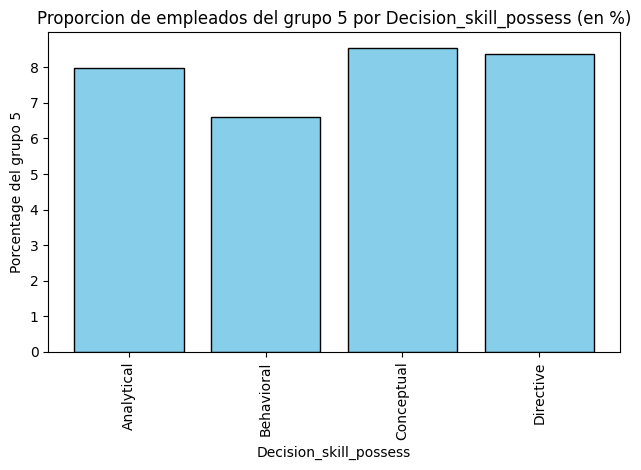

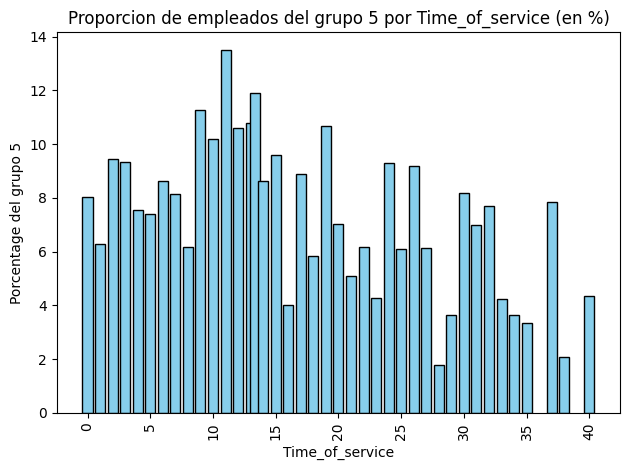

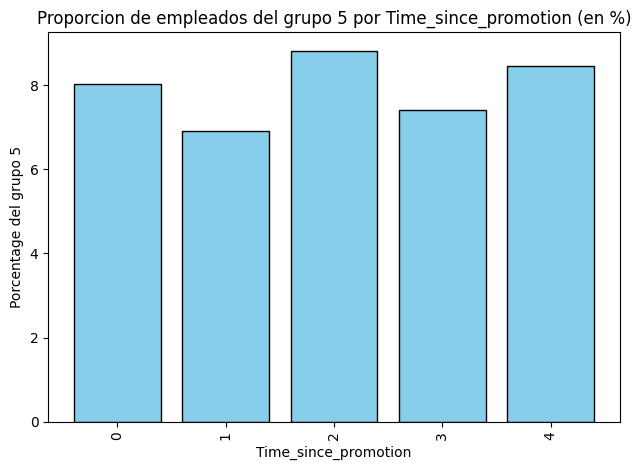

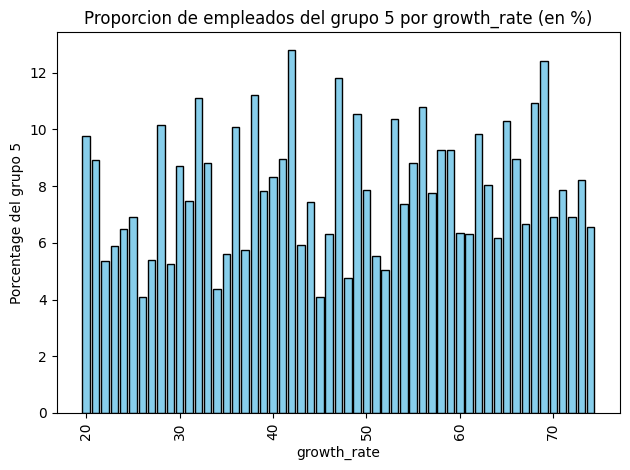

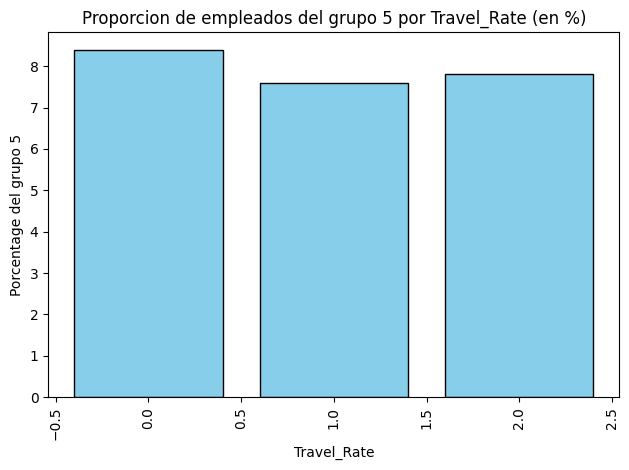

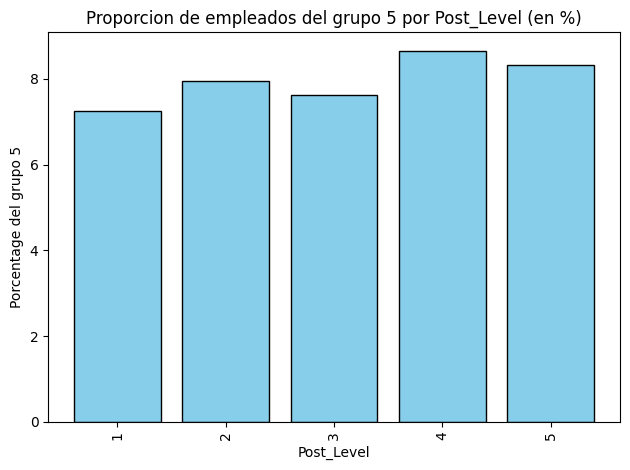

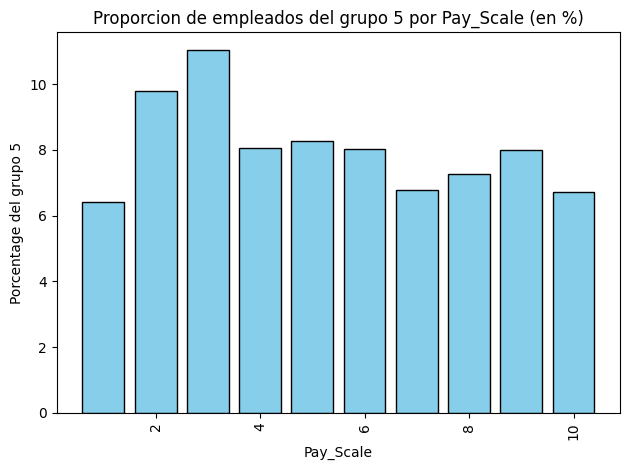

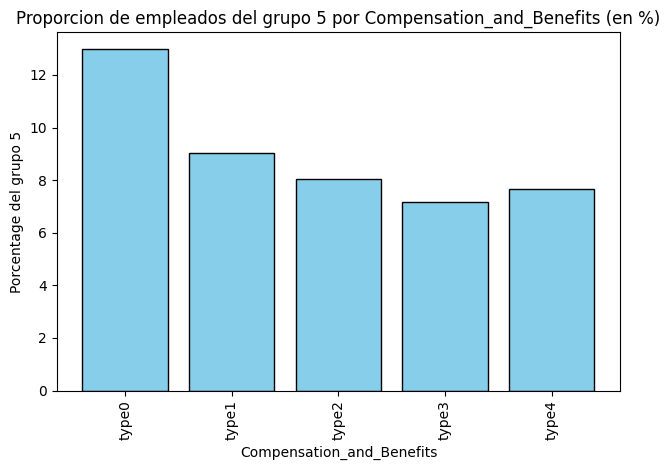

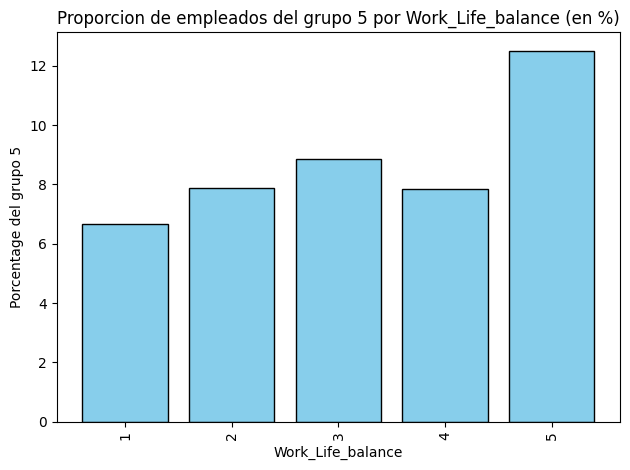

In [85]:
def plot_relative_counts(column):
  totals = data_k.groupby(column).size()
  totals_att_group = groups[attritioned_group].groupby(column).size()
  percentage = (totals_att_group / totals) * 100

  plt.bar(percentage.index, percentage.values, color='skyblue', edgecolor='black')
  plt.title(f'Proporcion de empleados del grupo 5 por {column} (en %)')
  plt.xlabel(column)
  plt.ylabel('Porcentage del grupo 5')

  plt.tight_layout()
  plt.show()

for column in data_k.columns:
  if column == 'cluster' or column == 'Attrition_rate':
    continue

  plot_relative_counts(column)

  #plot_relative_counts('Unit')
  #plot_relative_counts('Work_Life_balance')

In [ ]:
"""
De la tabla de resumen generada se pueden vislumbrar algunas caracteristicas que resaltan de algunos grupos:
-G1 y G4 tienen edades mas grandes
-G6 tiene los menores niveles de educacion
-G3 tiene los menores tiempos de servicio, mientras que G1 los mayores
-G2 tiene los mayores tiempos desde ascenso el ultimo ascenso, mientras que G3 los menores
-G2 tiene las mayores tasas de crecimiento, G4 las menores
-G0 tiene las mayores tasas de viajes, los mayores niveles de puesto y la mayor escala de paga
-G5 tiene la mayor tasa de desgaste

Ya se puede ver que el grupo 0 posiblemente sea el que contenga a altos mandos y ejecutivos,
que el 6 esta definido por niveles de educacion inferiores, y que el 5 es el mas desgastado
por mucho.

Como la variable que mas interesa es la tasa de desgaste se grafico esta contra las otras
categorias con los grupos como colores para encontrar patrones. Si se puede hallar que otras
caracteristicas definen al grupo 5 y a un trabajador desgastado, se pueden tomar desiciones
para todos los trabajadores (no solo los del G5) que tengan estas caracteristicas y arriba
de cierto nivel de desgaste.

Inicialmente al graficas las frecuencias absolutas del grupo 5 para cada variable, parece
haber relacion con algunos valores, por ejemplo, aquellos departamentos que tienen menores
frecuencias, el hecho de que hay pocos con 'work life balance' de nivel 5 y que casi todos
tienen typo 2 y 3 de compensacion.
Pero luego al graficar las frencuencias relativas se encuentra que los empleados del G5
parecen estar igualmente distribuidos en la mayoria de variables, es decir, las relaciones
vistas un paso atras podrian deberse menos a una relacion con la tasa de desagaste y mas
con la distribucion de las variables en todos los grupos. Por ejemplo, hay menos empleados
del grupo 5 en seguridad porque hay pocos empleados de esa unidad globalmente.
Con el analisis realizado no esta claro aun que otras caracteristicas se correlacionan con
una alta tasa de desgaste.
"""